In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [62]:
metrics = [
  "Memory used",
  "Program time",
  "Bind time",
  "Check time",
  "Emit time",
  "Total time",
]

def read_diagnose_file(p: str):
  df = pd.DataFrame(columns=metrics)
  
  with open(p) as f:
    lines = f.readlines()
    for line in lines:

      header = line.split(":")[0].strip()
      value = line.split(":")[1].strip()

      if(header in metrics):
        df.loc[0, header] = float(value[0:-1])
  
  [schema, name, extension] = p.split(".")

  name = "-".join(name.split("-")[0:-1])

  df.loc[0, "Type"] = os.path.basename(schema)
  df.loc[0, "Name"] = os.path.basename(name)
  df.loc[0, "Path"] = os.path.basename(p)
  return df


def list_benchmark_files():
  cwd = os.getcwd()
  rootPath = os.path.dirname(os.path.dirname(cwd))
  benchmarkPath = os.path.join(rootPath, "data/__benchmark__/")
  files = os.listdir(benchmarkPath)
  filePaths = [benchmarkPath + file for file in files]
  return filePaths

def build_pandas_dataframe():
  df = pd.DataFrame(columns=metrics)
  for file in list_benchmark_files():
    df = pd.concat([df, read_diagnose_file(file)], ignore_index=True)
  return df

cwd = os.getcwd()
rootPath = os.path.dirname(os.path.dirname(cwd))
df = build_pandas_dataframe()
names = df["Name"].unique()
types = df["Type"].unique()

names.sort()
types.sort()

if not os.path.exists("__assets__"):
  os.makedirs("__assets__")

print(df)
print(names)
print(types)

    Memory used Program time Bind time Check time Emit time Total time  \
0      117009.0         0.55      0.19       0.48       0.0       1.22   
1      117104.0         0.53      0.19       0.47       0.0       1.19   
2      116122.0         0.57       0.2       0.46       0.0       1.23   
3      100350.0         0.59      0.24       0.25       0.0       1.08   
4       98393.0         0.58       0.2       0.18       0.0       0.95   
..          ...          ...       ...        ...       ...        ...   
135    108366.0          0.5      0.18       0.24       0.0       0.93   
136     92264.0         0.63      0.25       0.14       0.0       1.03   
137     94277.0          0.6      0.21        0.1       0.0       0.92   
138     97523.0         0.63      0.23       0.22       0.0       1.08   
139     99561.0         0.67      0.24       0.14       0.0       1.05   

        Type         Name                       Path  
0        zod  3-complex-1      zod.3-complex-1-5.txt  
1

In [63]:
def plot_metrics(
    prefix, 
    df, 
    filter_key, 
    filter_values, 
    group_by_key, 
    metric_field, 
    x_label, 
    y_label, 
    title: str,
    filename: str,
):
    if not os.path.exists(prefix):
        os.mkdir(prefix)

    for _value in filter_values:
        df_filtered = df[df[filter_key] == _value]
        df_groupby = df_filtered.groupby(group_by_key)[[metric_field]].mean().sort_values(metric_field)

        y_value = df_groupby[metric_field].to_list()
        x_value = df_groupby.index.to_list()
        _filename = filename.format(_value)

        dest = f"{prefix}/{_filename}"

        plt.figure(figsize=(10, 5))

        plt.barh(x_value, y_value)
    
        # Add value annotation to bar with no deprecated api
        for i in range(len(df_groupby)):
            label = f"{df_groupby.iloc[i][metric_field]:.3f}"            

            plt.text(df_groupby.iloc[i][metric_field], i, label)
        
        plt.title(title.format(_value))
        plt.ylabel(y_label)
        plt.xlabel(x_label)
    
        plt.savefig(dest)
        plt.show() 
        plt.close()

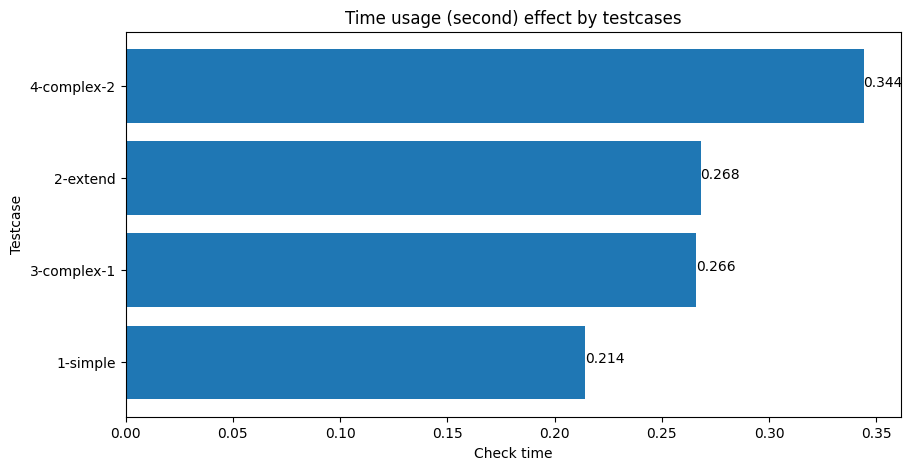

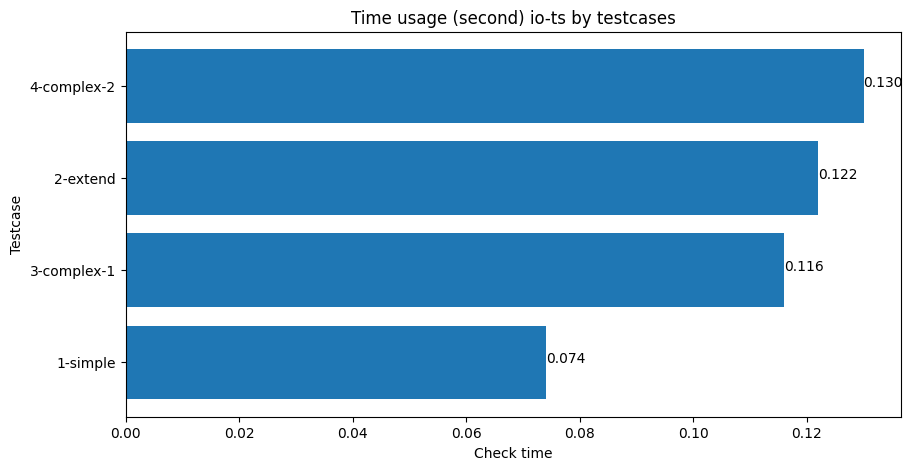

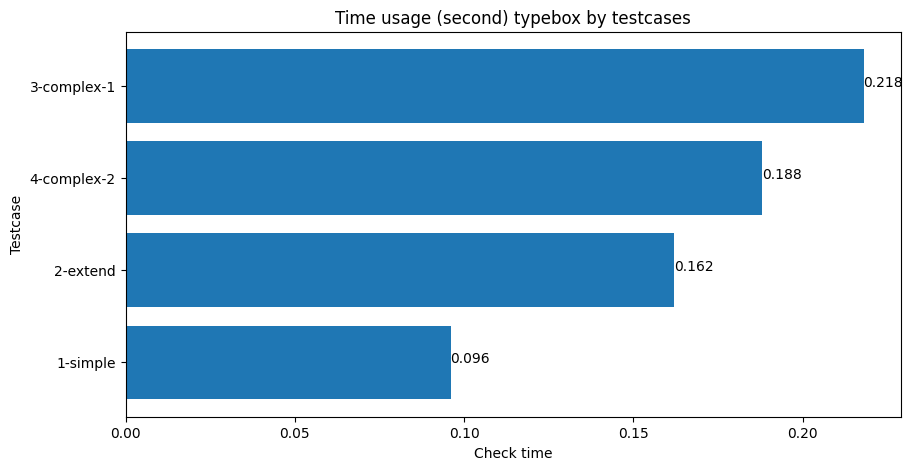

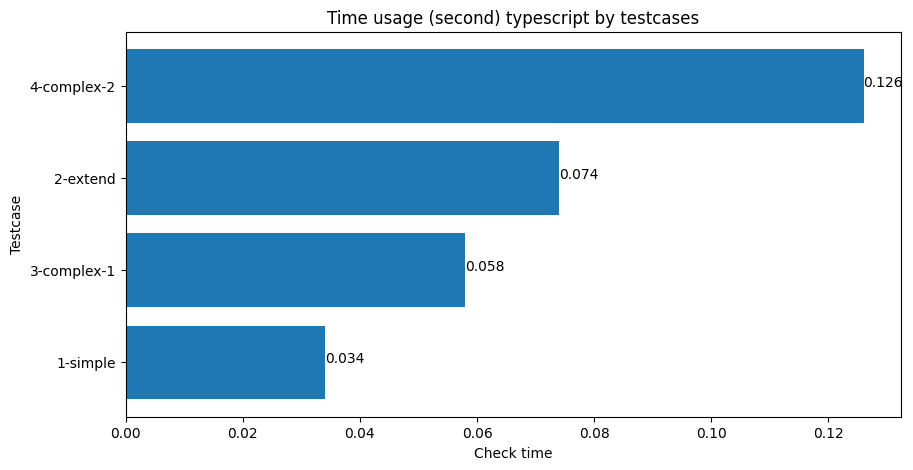

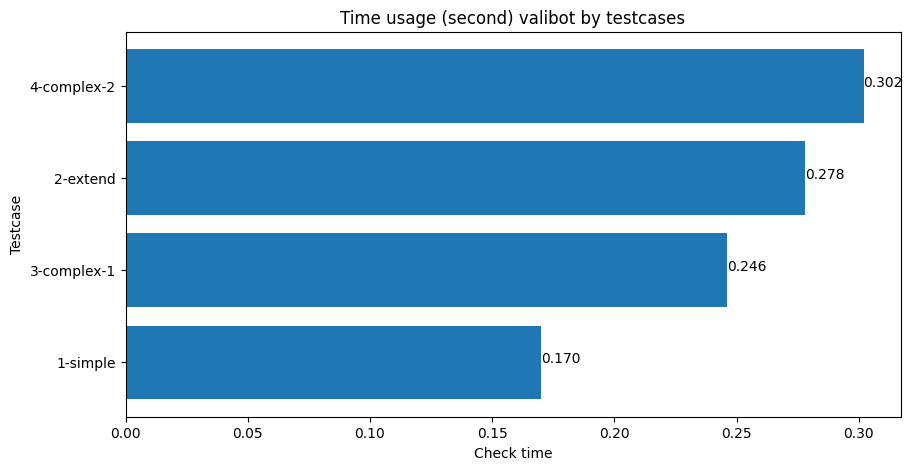

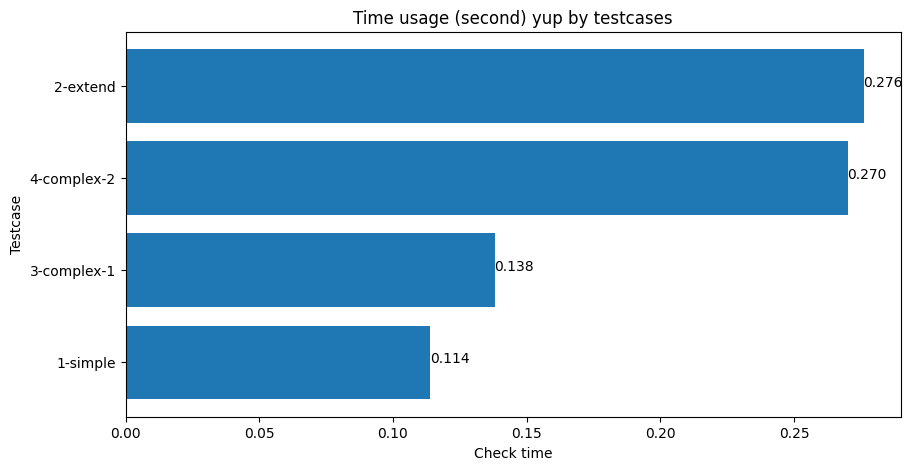

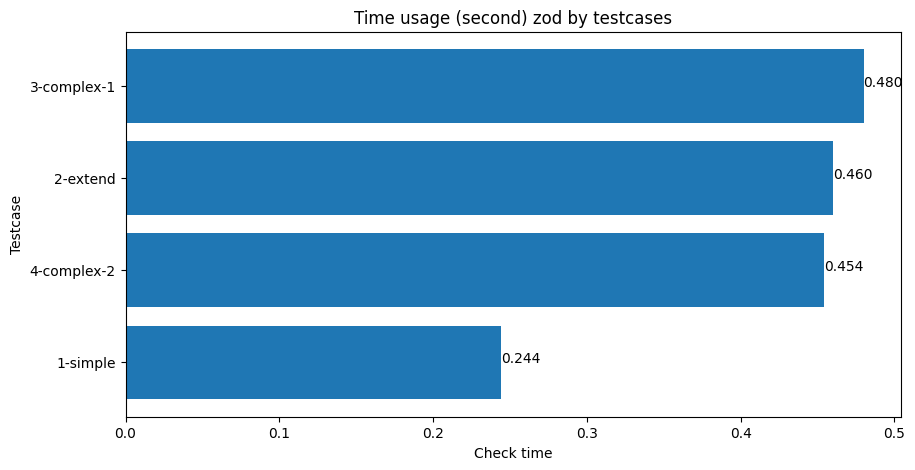

In [64]:
plot_metrics(
    prefix="__assets__/time_by_library", 
    df=df, 
    filter_key="Type", 
    filter_values=types, 
    group_by_key="Name", 
    metric_field="Check time", 
    x_label="Check time", 
    y_label="Testcase", 
    title="Time usage (second) {} by testcases",
    filename="total_time_{}.png"
)

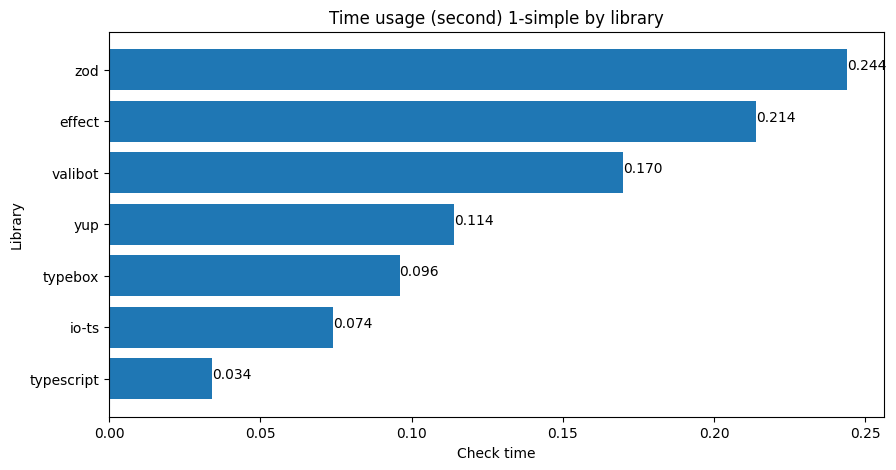

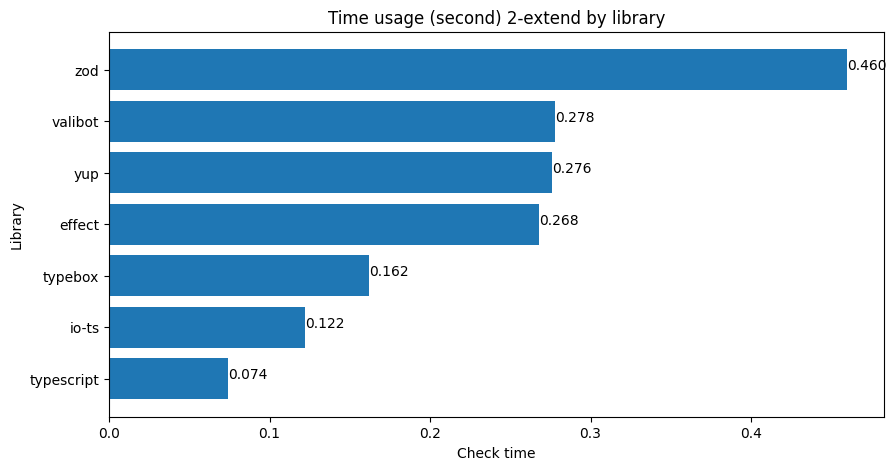

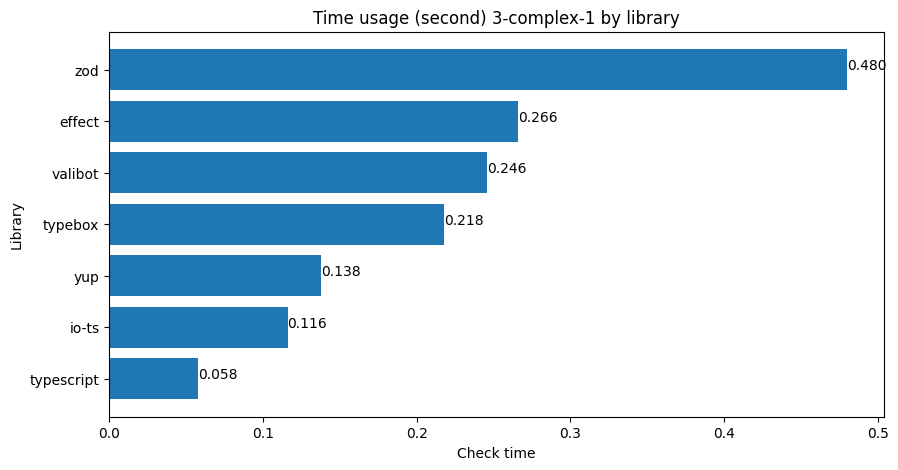

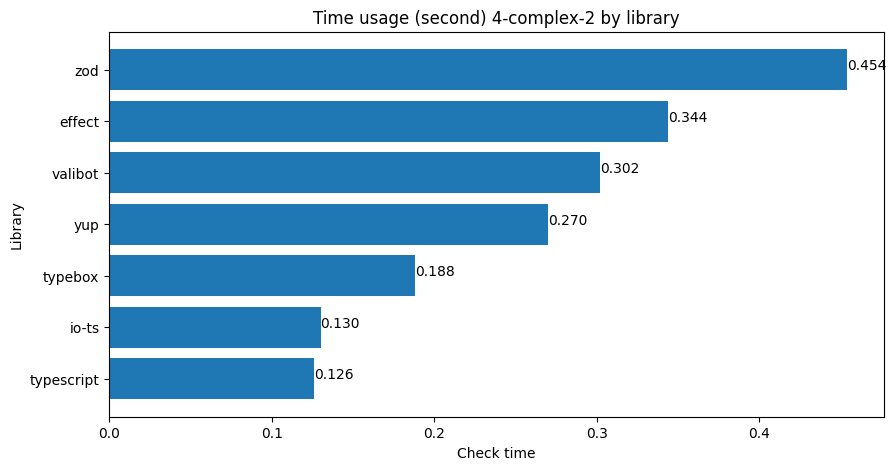

In [65]:
plot_metrics(
    prefix="__assets__/time_by_testcase", 
    df=df, 
    filter_key="Name", 
    filter_values=names, 
    group_by_key="Type", 
    metric_field="Check time", 
    x_label="Check time", 
    y_label="Library", 
    title='Time usage (second) {} by library',
    filename="total_time_{}.png"
)

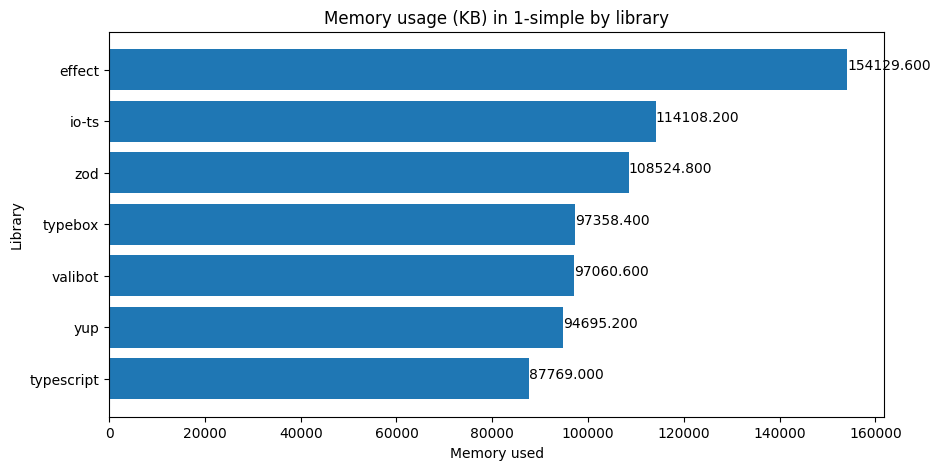

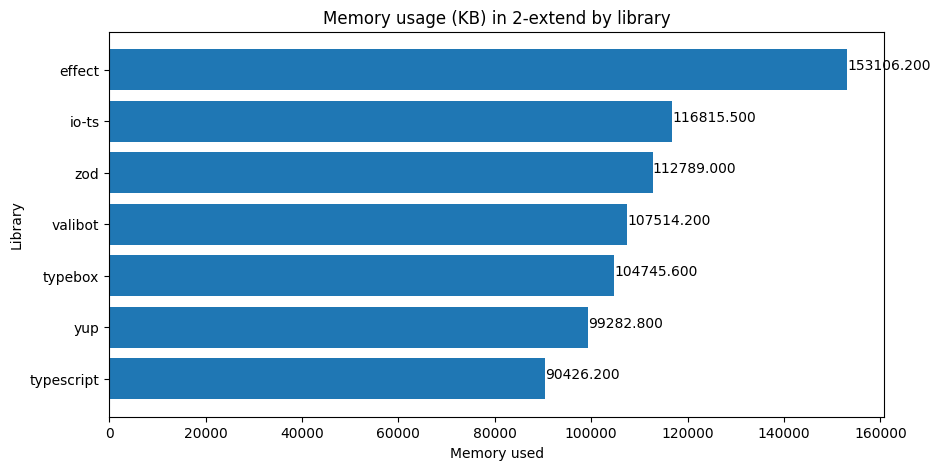

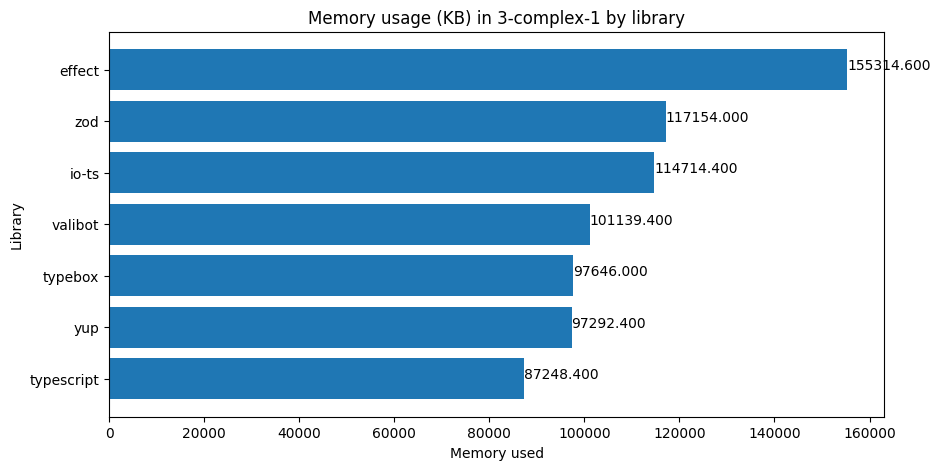

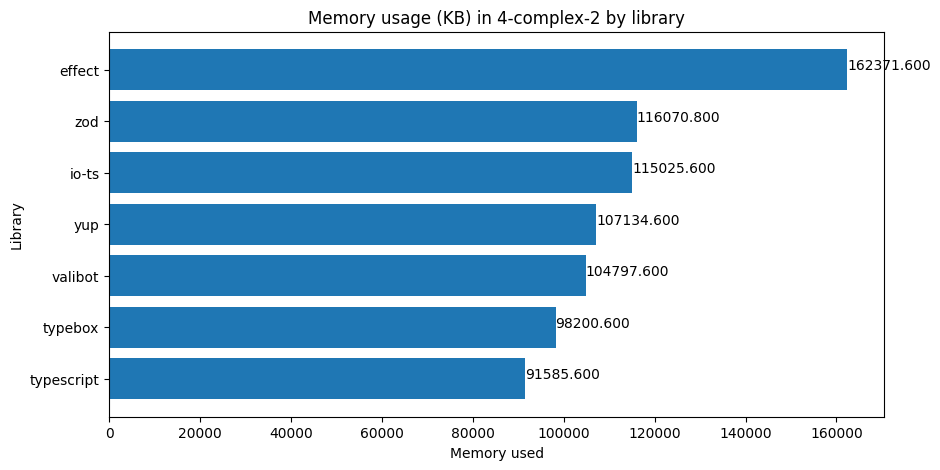

In [66]:
plot_metrics(
    prefix="__assets__/memory_by_testcase", 
    df=df,
    filter_key="Name", 
    filter_values=names, 
    group_by_key="Type", 
    metric_field="Memory used", 
    x_label="Memory used", 
    y_label="Library", 
    title='Memory usage (KB) in {} by library',
    filename="memory_usage_{}.png"
)

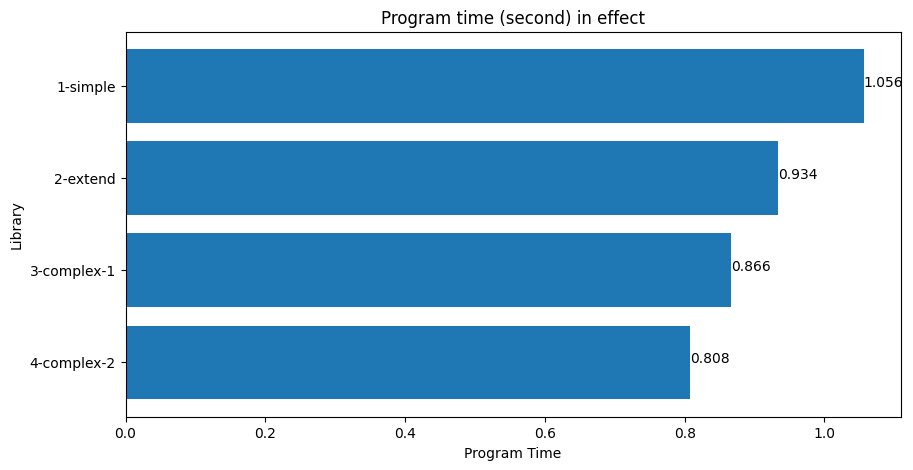

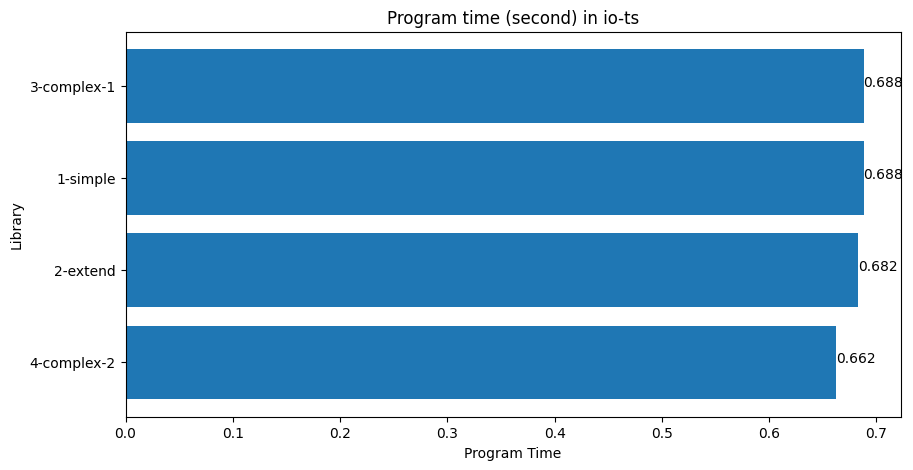

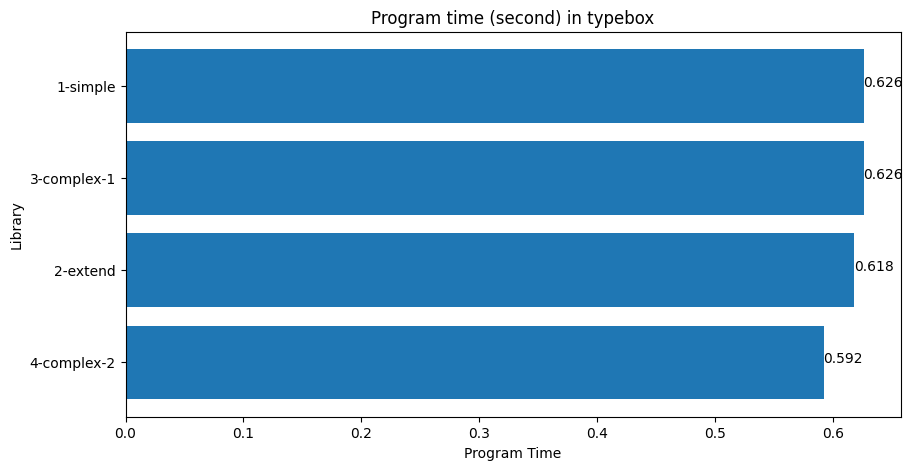

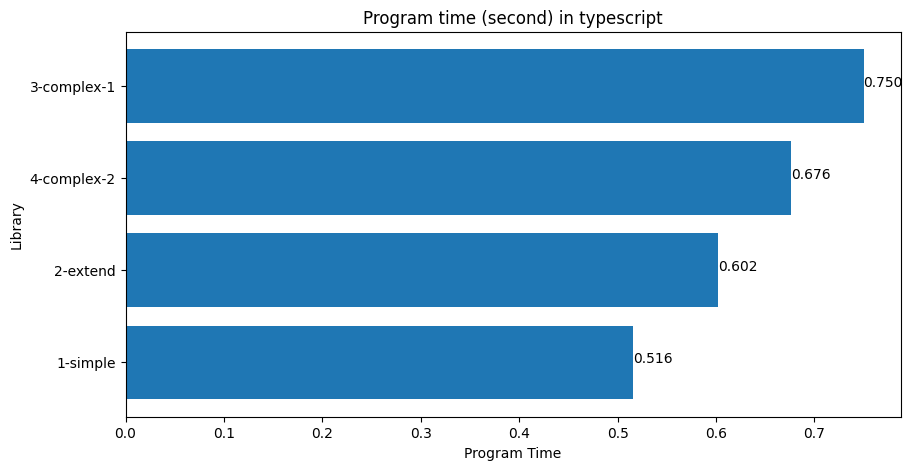

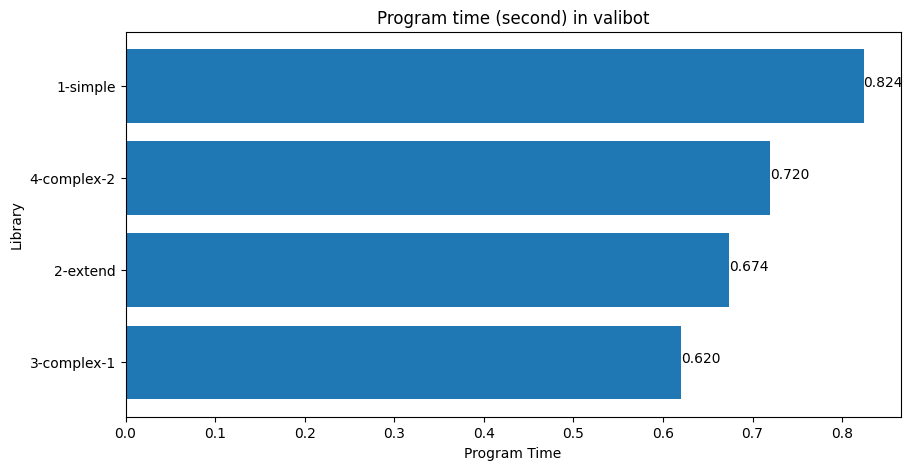

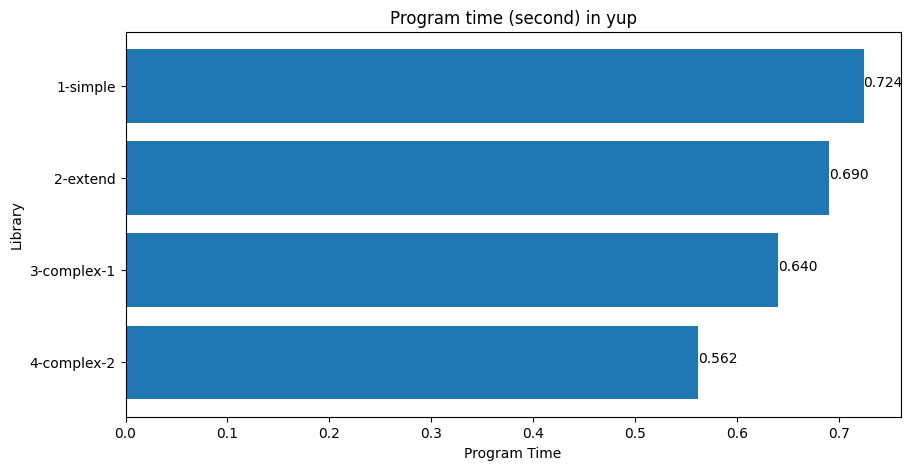

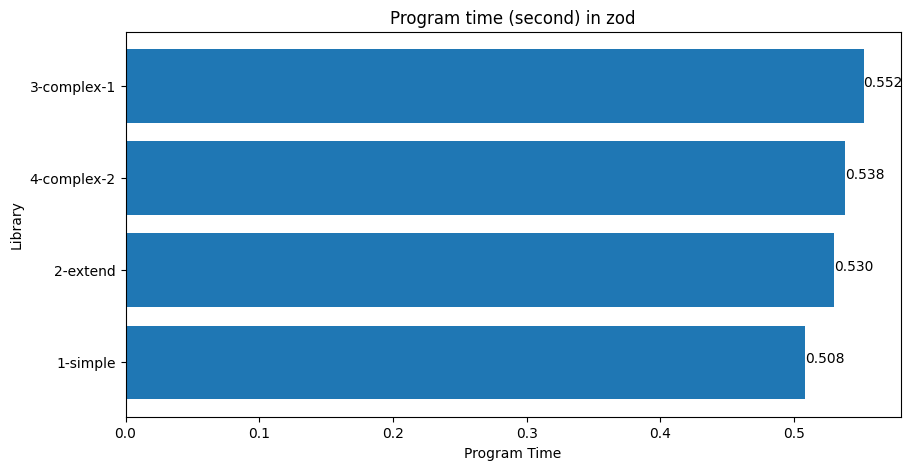

In [67]:
plot_metrics(
    prefix="__assets__/program_time_by_library", 
    df=df,
    filter_key="Type",
    filter_values=types, 
    group_by_key="Name", 
    metric_field="Program time", 
    x_label="Program Time",
    y_label="Library",
    title='Program time (second) in {}',
    filename="program_time_{}.png"
)

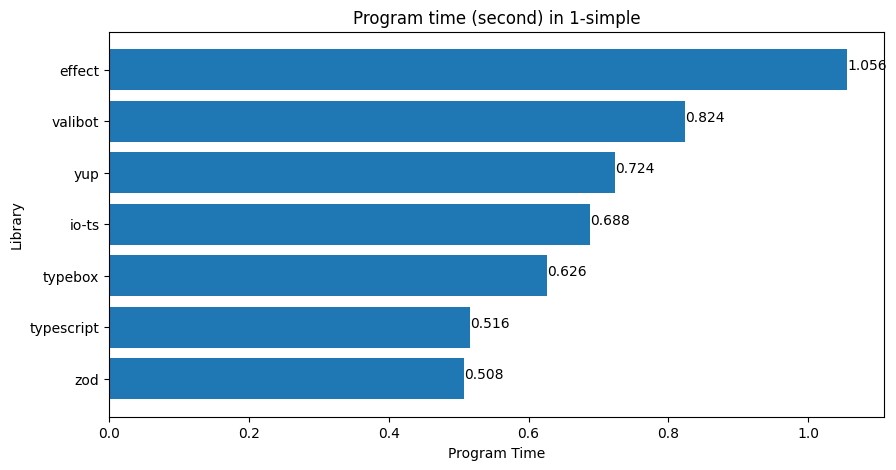

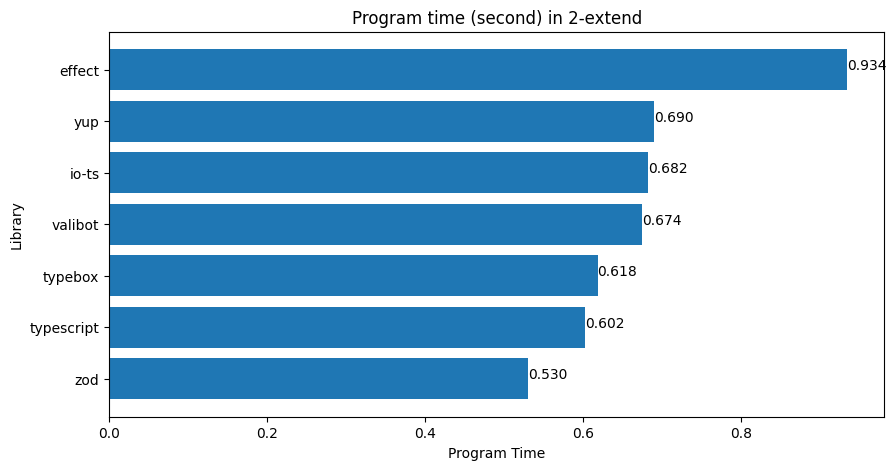

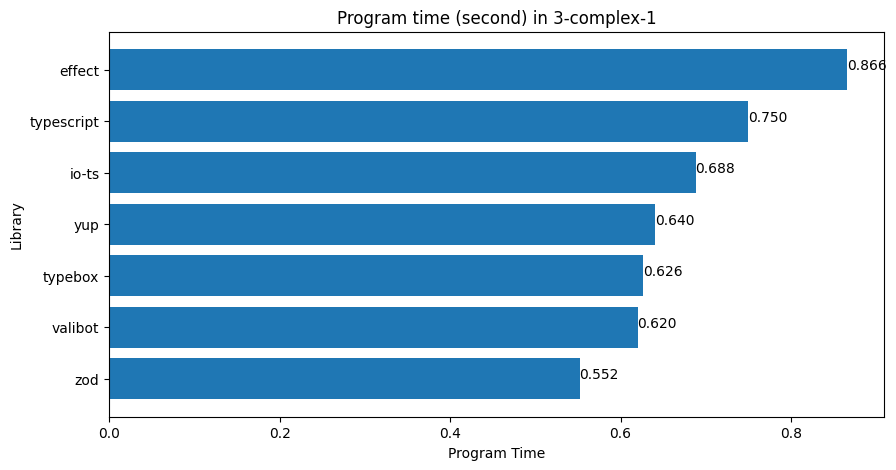

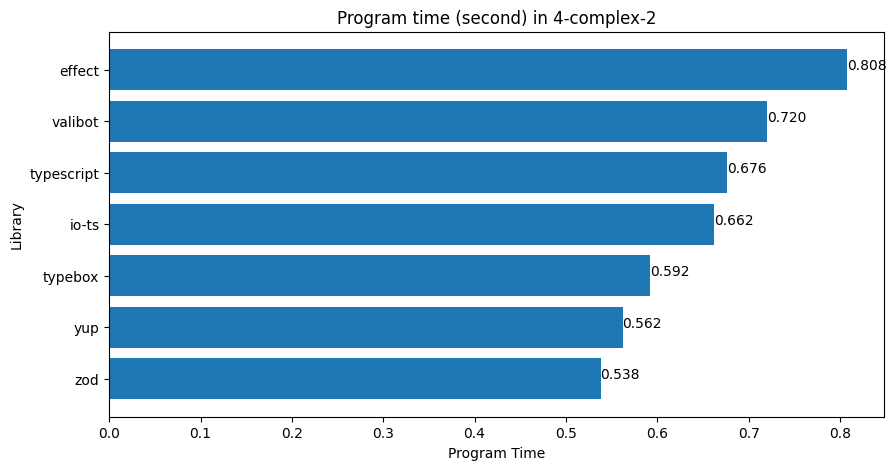

In [68]:
plot_metrics(
    prefix="__assets__/program_time_by_testcase", 
    df=df,
    filter_key="Name",
    filter_values=names, 
    group_by_key="Type", 
    metric_field="Program time", 
    x_label="Program Time",
    y_label="Library",
    title='Program time (second) in {}',
    filename="program_time_{}.png"
)

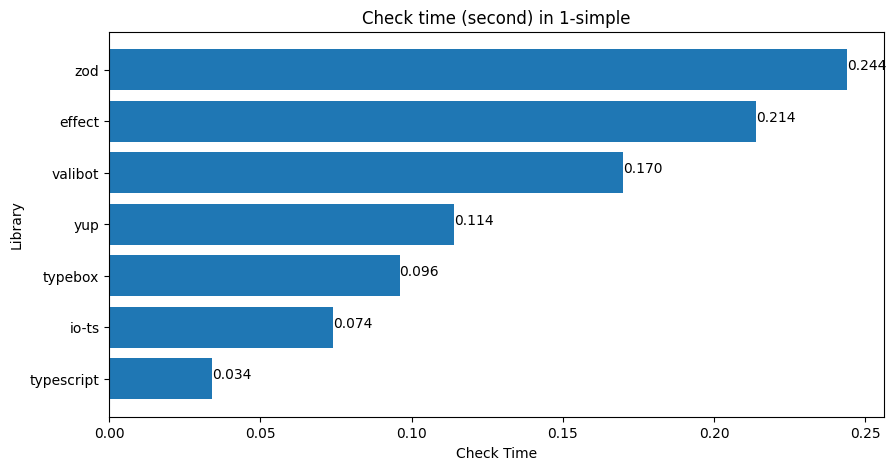

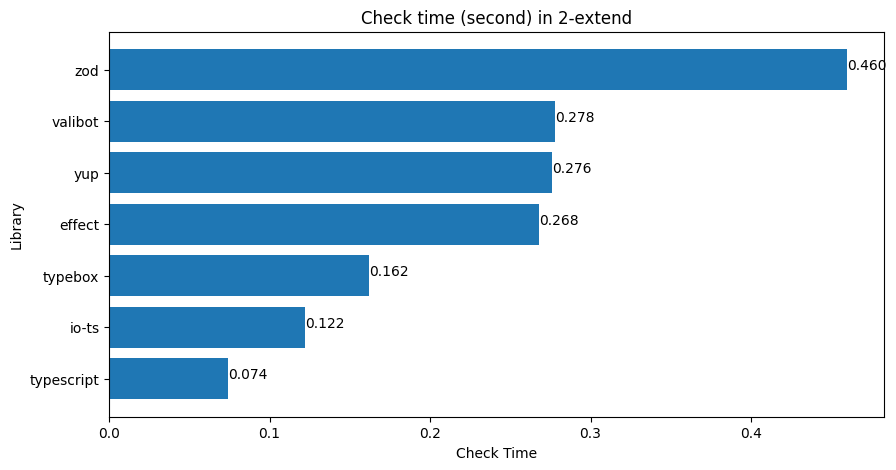

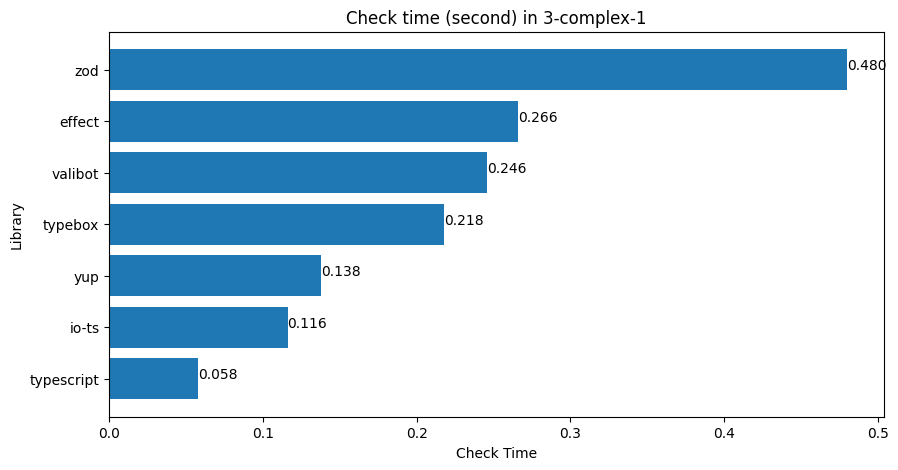

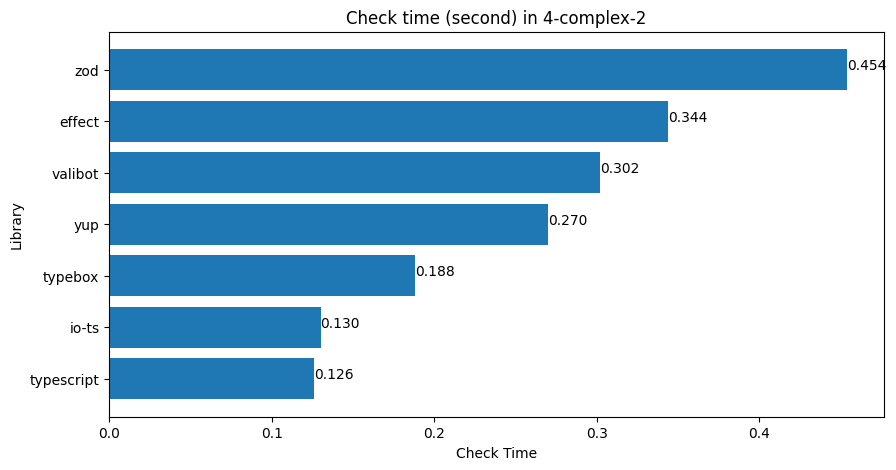

In [69]:
plot_metrics(
    prefix="__assets__/check_time_by_testcase", 
    df=df,
    filter_key="Name",
    filter_values=names, 
    group_by_key="Type", 
    metric_field="Check time", 
    x_label="Check Time",
    y_label="Library",
    title='Check time (second) in {}',
    filename="check_time_{}.png"
)